#### 1. Select a small sample (3-5 points) of the dataset.
#### 2. Compare this sample to the dataset as a whole.
#### 3. Convert the samples into Z-scores.
#### 4. Prepare a heatmap and a barplot of your sample points and of the sample point z-scores.

In [131]:
Boston <- read.table('Boston.csv', sep=",", header = T)

In [132]:
Boston$X <- NULL

In [133]:
dim(Boston); str(Boston)

[1] 506  14

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : int  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [134]:
Boston$medv <- NULL
Boston_features = Filter(is.numeric, Boston)

In [135]:
sum_vals = data.frame(feature=colnames(Boston_features))
sum_vals['mean_'] = sapply(Boston_features, mean)
sum_vals

feature,mean_
crim,3.61352356
zn,11.36363636
indus,11.13677866
chas,0.06916996
nox,0.55469506
rm,6.28463439
age,68.57490119
dis,3.79504269
rad,9.54940711
tax,408.23715415


In [136]:
install.packages('moments')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [137]:
library(moments)

In [138]:
skewness(Boston)

crim         zn      indus       chas        nox         rm        age 
 5.2076524  2.2190631  0.2941463  3.3957993  0.7271442  0.4024147 -0.5971856 
       dis        rad        tax    ptratio      black      lstat 
 1.0087788  1.0018335  0.6679683 -0.7999445 -2.8817983  0.9037707

In [198]:
stats = data.frame(feature=colnames(Boston))
stats['mean_'] = sapply(Boston, mean)
stats['sd_'] = sapply(Boston, sd)
stats['skewness_'] = sapply(Boston, skewness)
stats['kurtosis_'] = sapply(Boston, kurtosis)
stats

feature,mean_,sd_,skewness_,kurtosis_
crim,3.61352356,8.6015451,5.2076524,39.752786
zn,11.36363636,23.3224530,2.2190631,6.979949
indus,11.13677866,6.8603529,0.2941463,1.766782
chas,0.06916996,0.2539940,3.3957993,12.531453
nox,0.55469506,0.1158777,0.7271442,2.924136
rm,6.28463439,0.7026171,0.4024147,4.861027
age,68.57490119,28.1488614,-0.5971856,2.029986
dis,3.79504269,2.1057101,1.0087788,3.471299
rad,9.54940711,8.7072594,1.0018335,2.129479
tax,408.23715415,168.5371161,0.6679683,1.857015


In [199]:
library(dplyr, warn.conflicts = FALSE)

In [200]:
sample_1pct_1 = sample_n(Boston, 5)

In [201]:
colMeans(sample_1pct_1)

crim         zn      indus       chas        nox         rm        age 
  0.125806  14.000000   7.070000   0.000000   0.469800   6.011200  50.280000 
       dis        rad        tax    ptratio      black      lstat 
  4.487680   5.600000 339.600000  18.220000 386.996000  10.946000

In [202]:
colMeans(sample_1pct_1) - stats$mean_

crim           zn        indus         chas          nox           rm 
 -3.48771756   2.63636364  -4.06677866  -0.06916996  -0.08489506  -0.27343439 
         age          dis          rad          tax      ptratio        black 
-18.29490119   0.69263731  -3.94940711 -68.63715415  -0.23553360  30.32196838 
       lstat 
 -1.70706324

In [203]:
(colMeans(sample_1pct_1) - stats$mean_)/stats$sd_

crim         zn      indus       chas        nox         rm        age 
-0.4054757  0.1130397 -0.5927944 -0.2723291 -0.7326265 -0.3891656 -0.6499340 
       dis        rad        tax    ptratio      black      lstat 
 0.3289329 -0.4535764 -0.4072525 -0.1087942  0.3321322 -0.2390489

In [204]:
stats['mean_sample'] = sapply(sample_1pct_1, mean)
stats['sd_sample'] = sapply(sample_1pct_1, sd)
stats['skewness_sample'] = sapply(sample_1pct_1, skewness)
stats['kurtosis_sample'] = sapply(sample_1pct_1, kurtosis)
stats

feature,mean_,sd_,skewness_,kurtosis_,mean_sample,sd_sample,skewness_sample,kurtosis_sample
crim,3.61352356,8.6015451,5.2076524,39.752786,0.125806,0.03541548,-0.4494110,1.423192
zn,11.36363636,23.3224530,2.2190631,6.979949,14.000000,20.43281674,0.7499911,1.888576
indus,11.13677866,6.8603529,0.2941463,1.766782,7.070000,3.19389261,0.1820852,1.380456
chas,0.06916996,0.2539940,3.3957993,12.531453,0.000000,0.00000000,NaN,NaN
nox,0.55469506,0.1158777,0.7271442,2.924136,0.469800,0.05337790,0.4809974,1.843617
rm,6.28463439,0.7026171,0.4024147,4.861027,6.011200,0.44077795,1.3420288,3.024544
age,68.57490119,28.1488614,-0.5971856,2.029986,50.280000,20.96728404,-0.8267638,2.087073
dis,3.79504269,2.1057101,1.0087788,3.471299,4.487680,1.79181964,0.6878937,2.039278
rad,9.54940711,8.7072594,1.0018335,2.129479,5.600000,1.51657509,0.7500308,2.363894
tax,408.23715415,168.5371161,0.6679683,1.857015,339.600000,70.54998228,0.4395577,1.374971


Using feature as id variables


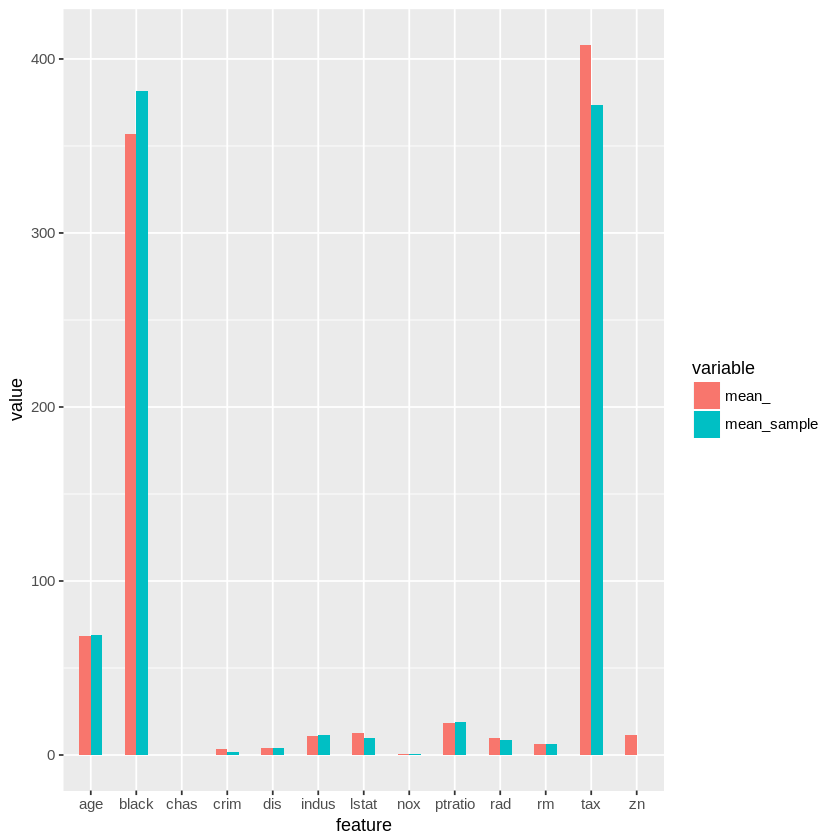

In [168]:
library(reshape2)
library(ggplot2)

ggplot(melt(stats[,c('feature','mean_','mean_sample')]), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

Using feature as id variables
Warning message:
“Removed 2 rows containing missing values (geom_bar).”

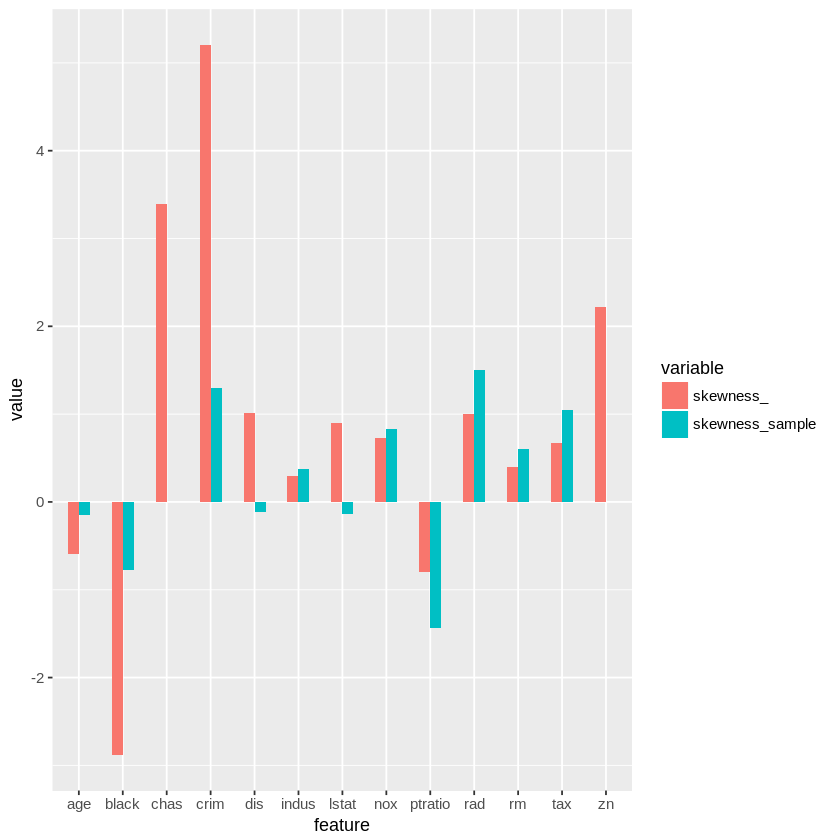

In [169]:
library(reshape2)
library(ggplot2)

ggplot(melt(stats[,c('feature','skewness_','skewness_sample')]), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

Using feature as id variables
Warning message:
“Removed 2 rows containing missing values (geom_bar).”

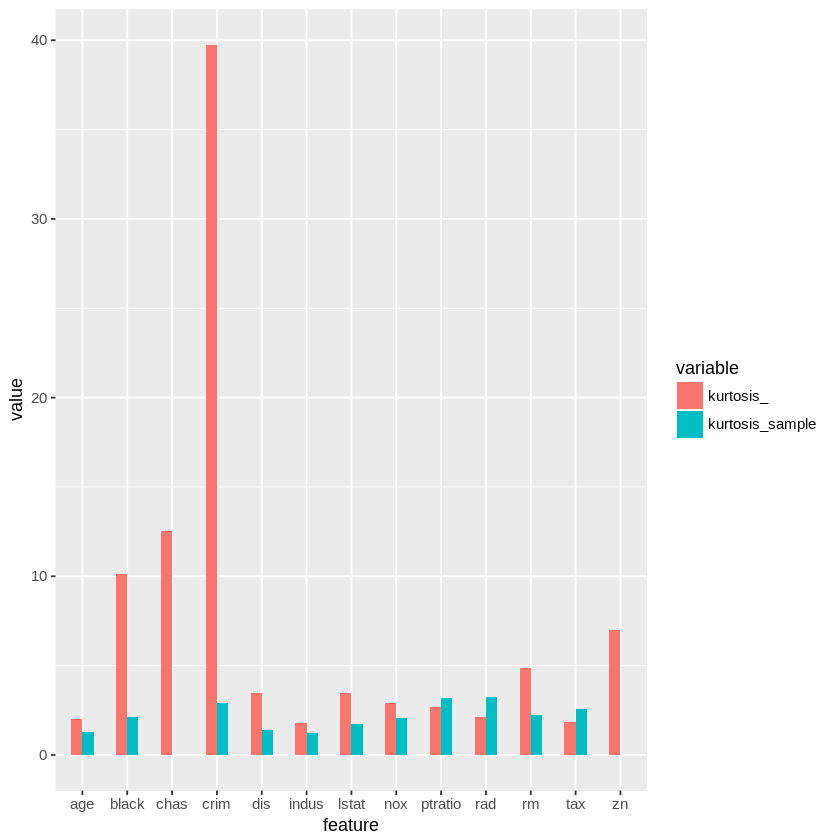

In [173]:
library(reshape2)
library(ggplot2)

ggplot(melt(stats[,c('feature','kurtosis_','kurtosis_sample')]), aes(x = feature, y = value, fill = variable)) + 
    geom_bar(stat = "identity", width=0.5, position = "dodge")

In [189]:
sample_1pct_1_matrix <- data.matrix(sample_1pct_1)


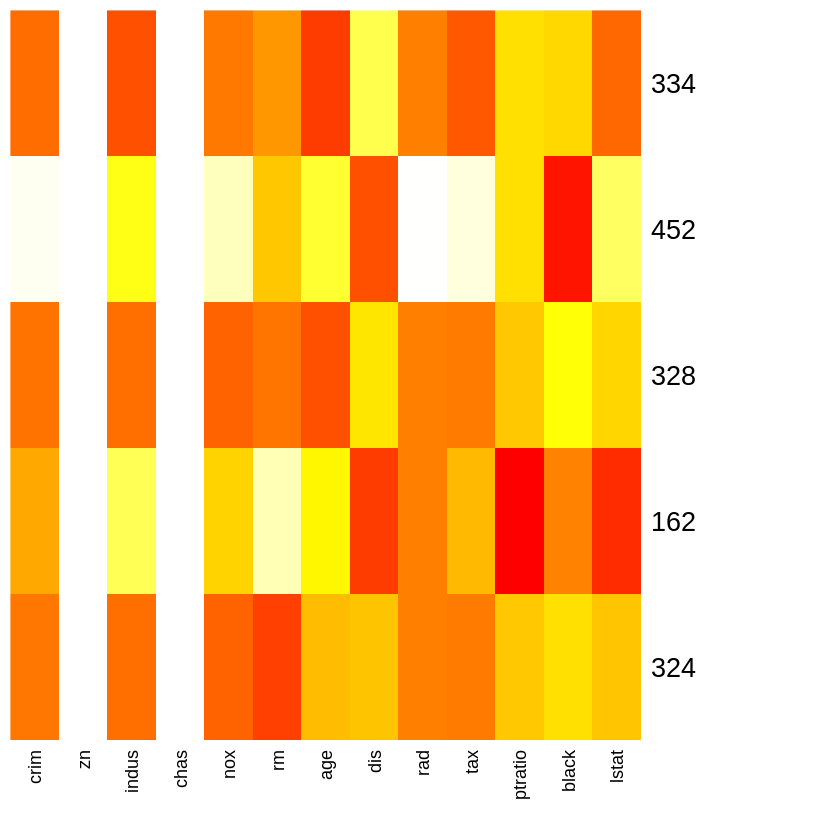

In [207]:
sample_1pct_1_heatmap <- heatmap(sample_1pct_1_matrix, Rowv=NA, Colv=NA, 
col = heat.colors(256), scale="column", margins=c(5,10))

#### 5. Prepare a speculation as to what each sample might represent.

 1) Sample 334 might be a pretty old small house in rural area which is not very safe.
 
 2) Sample 452 might in a neighborhood with high ratio of black, very safe area but far away from highways.
 
 3) Sample 328 might be an old small house which is far from the employment centres.
 
 4) Sample 162 might be a house with few rooms and it is in an area with small population, but with a high ratio of purpil teacher.
 
 5) Sample 324 may have more rooms in a not very safe rural area.

#### 6. Discuss whether values across categories be easily compared.

It's hard to compare across categories because the values are in different range, but after scaling the values, they become comparable. 